# Explore here

In [16]:
# Your code here
import pandas as pd

df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

X_train


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [18]:
print(f'Muestras de entrenamiento: {X_train.shape[0]}')
print(f'Muestras de prueba: {X_test.shape[0]}')

Muestras de entrenamiento: 614
Muestras de prueba: 154


In [19]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42)

model.fit(X_train,y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [20]:
y_pred_xgb = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred_xgb)

0.7207792207792207

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77        99
           1       0.59      0.71      0.64        55

    accuracy                           0.72       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154



In [22]:
resultados = []
for i in range(1,50):
    model_xgb = XGBClassifier(n_estimators=i,random_state=42)
    model_xgb.fit(X_train, y_train)
    y_pred = model_xgb.predict(X_test)
    print(f'model {i} listo')
    resultados.append((i,accuracy_score(y_test,y_pred)))
best_accuracy = 0
i=0
resultados_m = []
for resultado in resultados:
    resultados_m.append(resultado[1])
    if resultado[1] > best_accuracy:
       best_accuracy = resultado[1]
       i=resultado[0]
print(f'El mejor resultado es con n_estimators:{i} y su accuracuy es de {best_accuracy}')

model 1 listo
model 2 listo
model 3 listo
model 4 listo
model 5 listo
model 6 listo
model 7 listo
model 8 listo
model 9 listo
model 10 listo
model 11 listo
model 12 listo
model 13 listo
model 14 listo
model 15 listo
model 16 listo
model 17 listo
model 18 listo
model 19 listo
model 20 listo
model 21 listo
model 22 listo
model 23 listo
model 24 listo
model 25 listo
model 26 listo
model 27 listo
model 28 listo
model 29 listo
model 30 listo
model 31 listo
model 32 listo
model 33 listo
model 34 listo
model 35 listo
model 36 listo
model 37 listo
model 38 listo
model 39 listo
model 40 listo
model 41 listo
model 42 listo
model 43 listo
model 44 listo
model 45 listo
model 46 listo
model 47 listo
model 48 listo
model 49 listo
El mejor resultado es con n_estimators:3 y su accuracuy es de 0.7532467532467533


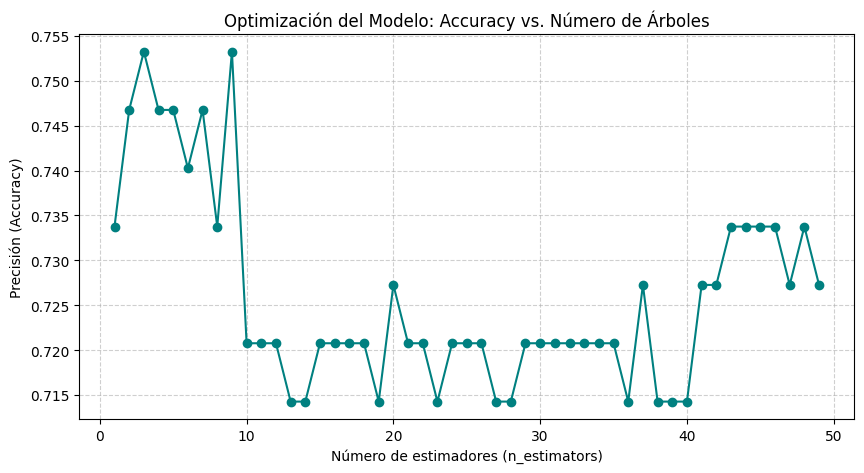

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, 50), resultados_m, marker='o', color='teal') 

plt.title('Optimización del Modelo: Accuracy vs. Número de Árboles')
plt.xlabel('Número de estimadores (n_estimators)')
plt.ylabel('Precisión (Accuracy)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()

model_dt.fit(X_train,y_train)
model_rf.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

print(f'El accuracy score para un arbol de decisión es de:{accuracy_score(y_test,y_pred_dt)} y el de random forestb es de:{accuracy_score(y_test,y_pred_rf)}')

El accuracy score para un arbol de decisión es de:0.7402597402597403 y el de random forestb es de:0.7337662337662337


In [29]:
# Entrenamos el modelo definitivo con el mejor n_estimators encontrado anteriormente (la variable 'i')
best_xgb_model = XGBClassifier(n_estimators=i, random_state=42)
best_xgb_model.fit(X_train, y_train)

print(f"Modelo final listo para guardar con n_estimators = {i}")

Modelo final listo para guardar con n_estimators = 3


In [30]:
import os

# 1. Crear la carpeta 'models' si no existe
if not os.path.exists('models'):
    os.makedirs('models')

# 2. Guardar el modelo de Boosting
best_xgb_model.save_model("models/best_model.json")

print("¡Paso 3 completado! El modelo se ha guardado en 'models/best_model.json'")

¡Paso 3 completado! El modelo se ha guardado en 'models/best_model.json'


#Análisis Final de tus Resultados
XGBoost (Optimizado con 3 árboles)	0.7532
Árbol de Decisión	0.7402
Random Forest	0.7337

Optimización de hiperparámetros mediante un bucle de entrenamiento, encontrando que el modelo XGBoost con 3 estimadores alcanzó la mayor precisión (75.32%), superando al Árbol de Decisión y al Random Forest.